In [3]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import re

pd.set_option('max_columns', None)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
rcParams['figure.figsize'] = 12, 10

In [26]:
df = pd.read_csv('crime.txt')
df.columns = ['agency', 'crime', 'time', 'addr', 'zip', 'community']
df['crime'] = df['crime'].astype(str)
df.head()

,agency,crime,time,addr,zip,community
0,SAN DIEGO,GRAND THEFT FROM PERSON,1/3/2018 16:30:00,7800 BLOCK STALMER STREET,92111.0,SAN DIEGO
1,HARBOR POLICE,SELL LIQUOR TO MINOR (M),9/23/2017 18:28:00,3200 BLOCK NORTH HARBOR DRIVE,92101.0,SAN DIEGO
2,HARBOR POLICE,"DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLU...",10/6/2017 8:48:00,600 BLOCK CONVENTION WAY,92101.0,SAN DIEGO
3,HARBOR POLICE,"DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLU...",10/11/2017 19:45:00,3600 BLOCK NORTH HARBOR DRIVE,92101.0,SAN DIEGO
4,HARBOR POLICE,POSS NARCOTIC CONTROLLED SUBS (M),10/21/2017 23:36:00,100 W BLOCK HARBOR DRIVE,92101.0,SAN DIEGO


In [27]:
[x for x in df.crime.unique() if 'theft' in str(x).lower()]

['GRAND THEFT FROM PERSON',
 "TAKE VEHICLE W/O OWNER'S CONSENT/VEHICLE THEFT (F)",
 'PETTY THEFT(Shoplift) (M)',
 'PETTY THEFT',
 'GRAND THEFT/UNSPECIFIED',
 "TAKE VEHICLE W/O OWNER'S CONSENT/VEHICLE THEFT",
 'PETTY THEFT(from Coin Oper Machine) (M)',
 'PETTY THEFT(from Building) (M)',
 'PETTY THEFT(All Other Larceny) (M)',
 'GRAND THEFT (Theft From Mot Veh) (F)',
 'GRAND THEFT:MONEY/LABOR/PROPERTY (F)',
 'PETTY THEFT / THEFT OF PERSONAL PROPERTY / SHOPLIFT',
 'THEFT BY USE OF ACCESS CARD INFORMATION [OVER $950] (F)',
 'PETTY THEFT(from Veh) (M)',
 'THEFT BY USE OF CREDIT CARD (UNDER $950)',
 'GRAND THEFT (Theft From Building) (F)',
 'PETTY THEFT(Mot Veh Parts) (M)',
 'GRAND THEFT (Theft of Mot Veh Parts/Acc) (F)',
 'THEFT BY USE OF CREDIT CARD (OVER $950)',
 'GRAND THEFT:MONEY/LABOR/PROPERTY OVER $950',
 'GRAND THEFT (Mot Veh Theft) (F)',
 'ATTEMPTED PETTY THEFT',
 'PETTY THEFT(Purse Snatch) (M)',
 'THEFT BY USE OF ACCESS CARD INFORMATION [$950 OR LESS] (M)',
 'THEFT (M)',
 'GRAND THE

In [28]:
from datetime import datetime


def time_fix(row):
    t = str(row['time'])
    return datetime.strptime(t, "%m/%d/%Y %H:%M:%S")


df['time_fix'] = df.apply(time_fix, axis=1)


def doy(row):
    d = row['time_fix']
    return d.timetuple().tm_yday


df['doy'] = df.apply(doy, axis=1)


def month(row):
    m = row['time_fix']
    return m.month


df['month'] = df.apply(month, axis=1)


def hour(row):
    h = row['time_fix']
    return h.hour


df['hour'] = df.apply(hour, axis=1)

In [29]:
dto = datetime.strptime('2/3/2018 16:30:00', "%m/%d/%Y %H:%M:%S")
dto.weekday()
# datetime.now().timetuple().tm_yday
dto.timetuple().tm_yday

34

In [30]:
def type_find(row):
    t = str(row['crime']).lower()
    # print(t)
    if 'firearm' in t or 'ammunition' in t or 'shoot' in t:
        return 'gun'
    if 'controlled' in t or 'contr' in t or 'drug' in t or 'paraphernalia' in t or 'cntl' in t:
        return 'drug'
    if 'theft' in t or 'burglary' in t or 'robbery' in t or 'obtain money' in t:
        return 'theft'
    if 'drunk' in t or 'liquor' in t or 'open container' in t or 'alcohol' in t or 'alc' in t:
        return 'alcohol'
    if 'marijuana' in t or 'cannabis' in t or 'weed' in t:
        return 'weed'
    if 'weapon' in t or 'metal knuckles' in t or 'leaded cane' in t or 'shuriken' in t or 'knife' in t or 'dagger' in t:
        return 'weapons'
    if 'sex' in t or 'rape' in t or 'intimate' in t or 'indecent exposure' in t or 'obscene' in t or 'prostitution' in t:
        return 'sexual'
    if 'assault' in t or 'battery' in t:
        return 'assault'
    if 'resist' in t:
        return 'resisting'
    if 'shoplifting' in t:
        return 'shoplifting'
    if 'fraud' in t or 'defraud' in t or 'personate' in t:
        return 'fraud'
    if 'vandalism' in t:
        return 'vandalism'
    if 'elder' in t:
        return 'elder abuse'
    if 'get credit' in t or 'personal identific' in t:
        return 'identity theft'
    if 'terrorize' in t or 'terrorist' in t:
        return 'terrorism'
    if 'animal' in t:
        return 'animal'
    if 'child' in t or 'minor' in t:
        return 'child'
    if 'tamper' in t or 'carjacking' in t:
        return 'vehicle tampering'
    if 'arson' in t:
        return 'arson'
    else:
        return 'none'


df['type'] = df.apply(type_find, axis=1)

In [31]:
# df[df['type'] == 'none'].reset_index()
len(df[df['type'] == 'none'].reset_index())
# df.head(30)
# pd.value_counts(df[df['type'] == 'none'].reset_index()['crime'])
# pd.value_counts(df['crime'])

907

In [32]:
df.head()

,agency,crime,time,addr,zip,community,time_fix,doy,month,hour,type
0,SAN DIEGO,GRAND THEFT FROM PERSON,1/3/2018 16:30:00,7800 BLOCK STALMER STREET,92111.0,SAN DIEGO,2018-01-03 16:30:00,3,1,16,theft
1,HARBOR POLICE,SELL LIQUOR TO MINOR (M),9/23/2017 18:28:00,3200 BLOCK NORTH HARBOR DRIVE,92101.0,SAN DIEGO,2017-09-23 18:28:00,266,9,18,alcohol
2,HARBOR POLICE,"DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLU...",10/6/2017 8:48:00,600 BLOCK CONVENTION WAY,92101.0,SAN DIEGO,2017-10-06 08:48:00,279,10,8,drug
3,HARBOR POLICE,"DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLU...",10/11/2017 19:45:00,3600 BLOCK NORTH HARBOR DRIVE,92101.0,SAN DIEGO,2017-10-11 19:45:00,284,10,19,drug
4,HARBOR POLICE,POSS NARCOTIC CONTROLLED SUBS (M),10/21/2017 23:36:00,100 W BLOCK HARBOR DRIVE,92101.0,SAN DIEGO,2017-10-21 23:36:00,294,10,23,drug


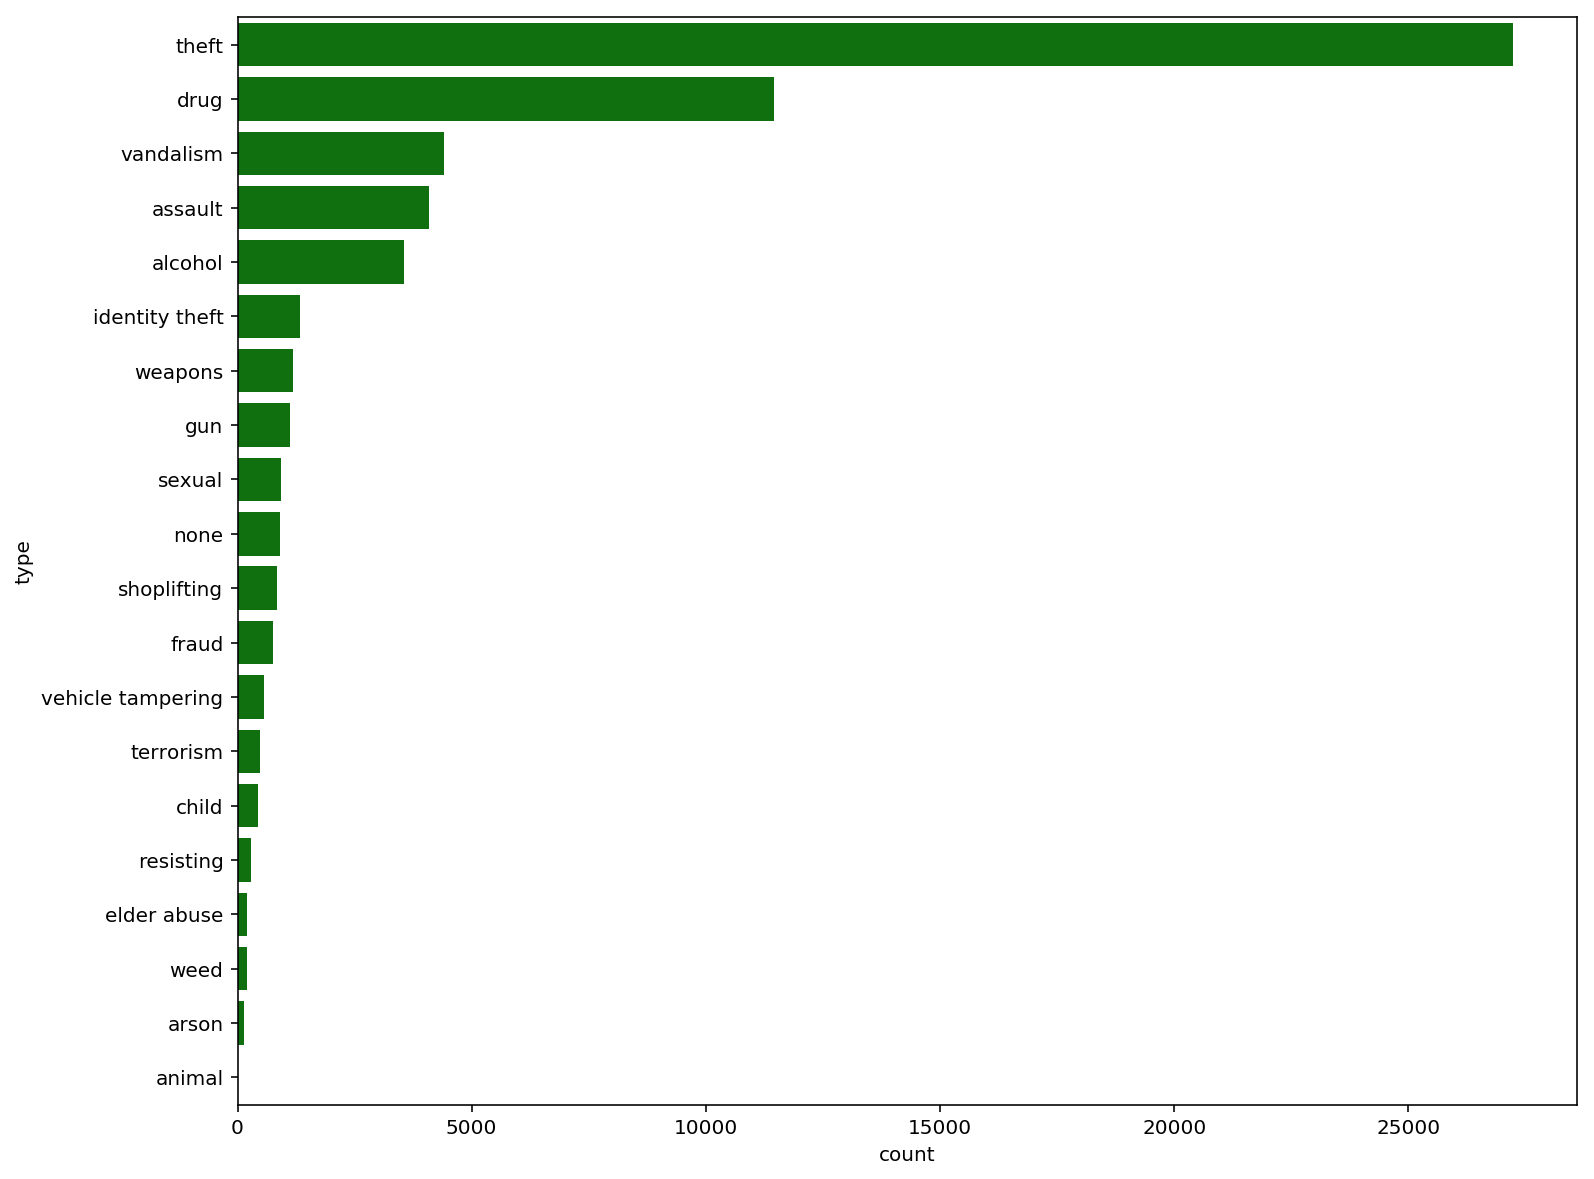

In [58]:
# sns.countplot(y='type', data=df[df['hour'] == 1], order=df['type'].value_counts().index, color='green')
sns.countplot(y='type', data=df, order=df['type'].value_counts().index, color='green')

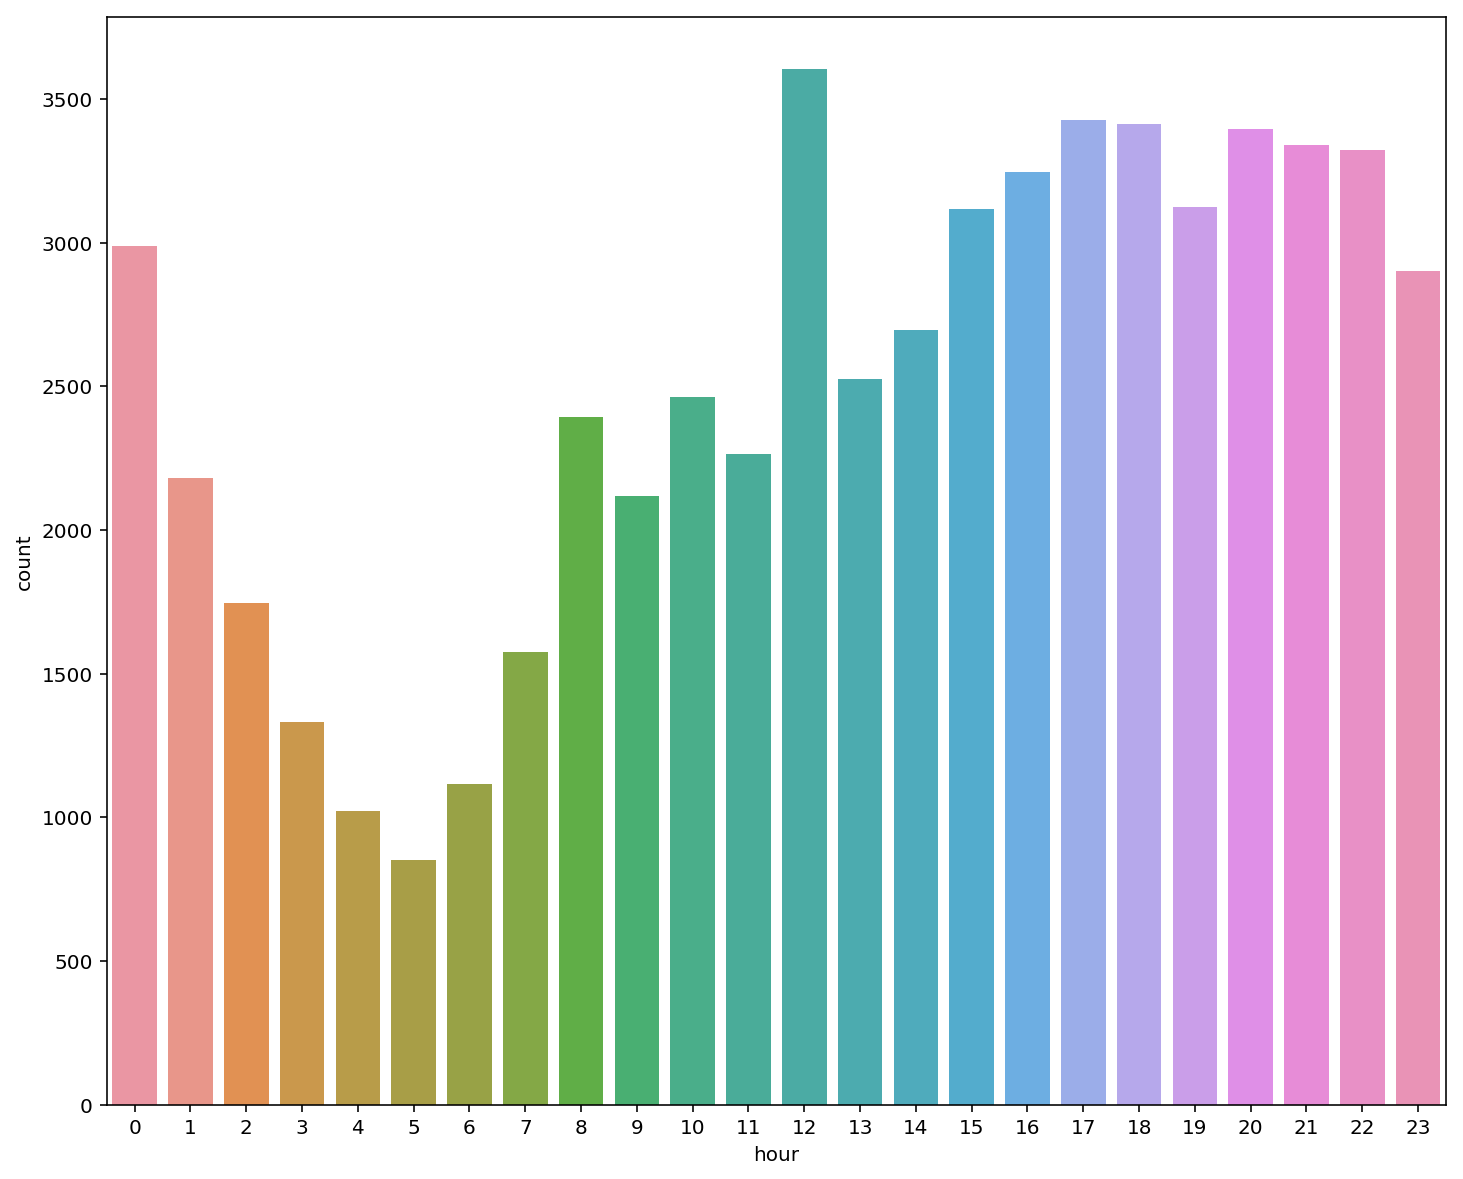

In [71]:
# sns.countplot(x='hour', data=df.drop(df[df['type'] == 'identity theft'].index))
# sns.countplot(x='hour', data=df[df['type'] == 'theft'])
sns.countplot(x='hour', data=df)

In [65]:
df.drop(df[df['type'] == 'identity theft'].index)


,agency,crime,time,addr,zip,community,time_fix,doy,month,hour,type,hour_range
0,SAN DIEGO,GRAND THEFT FROM PERSON,1/3/2018 16:30:00,7800 BLOCK STALMER STREET,92111.0,SAN DIEGO,2018-01-03 16:30:00,3,1,16,theft,2
1,HARBOR POLICE,SELL LIQUOR TO MINOR (M),9/23/2017 18:28:00,3200 BLOCK NORTH HARBOR DRIVE,92101.0,SAN DIEGO,2017-09-23 18:28:00,266,9,18,alcohol,3
2,HARBOR POLICE,"DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLU...",10/6/2017 8:48:00,600 BLOCK CONVENTION WAY,92101.0,SAN DIEGO,2017-10-06 08:48:00,279,10,8,drug,1
3,HARBOR POLICE,"DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLU...",10/11/2017 19:45:00,3600 BLOCK NORTH HARBOR DRIVE,92101.0,SAN DIEGO,2017-10-11 19:45:00,284,10,19,drug,3
4,HARBOR POLICE,POSS NARCOTIC CONTROLLED SUBS (M),10/21/2017 23:36:00,100 W BLOCK HARBOR DRIVE,92101.0,SAN DIEGO,2017-10-21 23:36:00,294,10,23,drug,3
5,SAN DIEGO,POSSESS MARIJUANA 1 OZ OR LESS WHILE DRIVING,1/8/2018 12:25:00,7600 BLOCK COPLEY PARK PLACE,92111.0,SAN DIEGO,2018-01-08 12:25:00,8,1,12,weed,2
6,HARBOR POLICE,MANUFACTURE/SALE/POSSESS/ETC METAL KNUCKLES (M),11/1/2017 17:15:00,3600 BLOCK NORTH HARBOR DRIVE,92101.0,SAN DIEGO,2017-11-01 17:15:00,305,11,17,weapons,2
7,HARBOR POLICE,MINOR:KNOWINGLY OPER VEH W/CARRYING ALC (M),11/4/2017 4:30:00,W LAUREL STREET / PACIFIC HIGHWAY,92101.0,SAN DIEGO,2017-11-04 04:30:00,308,11,4,alcohol,0
8,HARBOR POLICE,USE/UNDER INFL OF CONTROLLED SUBS (M),11/12/2017 8:11:17,3100 BLOCK PACIFIC HIGHWAY,92101.0,SAN DIEGO,2017-11-12 08:11:17,316,11,8,drug,1
9,HARBOR POLICE,BURGLARY (COMMERCIAL) (F),9/1/2017 19:53:00,3700 BLOCK NORTH HARBOR DRIVE,92101.0,SAN DIEGO,2017-09-01 19:53:00,244,9,19,theft,3


In [39]:
df[df['type'] == 'identity theft']

,agency,crime,time,addr,zip,community,time_fix,doy,month,hour,type
85,SHERIFF,GET CREDIT/ETC OTHER'S ID (F),9/13/2017 15:39:00,5100 BLOCK ROBINWOOD ROAD,91902.0,BONITA,2017-09-13 15:39:00,256,9,15,identity theft
139,CORONADO,GET CREDIT/ETC OTHERS ID,11/22/2017 12:00:00,600 BLOCK COUNTRY CLUB LANE,92118.0,CORONADO,2017-11-22 12:00:00,326,11,12,identity theft
158,SAN DIEGO,GET CREDIT/ETC OTHERS ID,11/30/2017 12:00:00,9700 BLOCK CAMTO PUDREGAL,92131.0,SAN DIEGO,2017-11-30 12:00:00,334,11,12,identity theft
226,CORONADO,USE ANOTHER PERSONAL IDENTIFICATION TO OBTAIN ...,11/30/2017 12:04:00,1000 BLOCK ORANGE AVENUE,92118.0,CORONADO,2017-11-30 12:04:00,334,11,12,identity theft
229,CORONADO,USE ANOTHER PERSONAL IDENTIFIC,12/14/2017 0:01:00,1000 BLOCK OLIVE AVENUE,92118.0,CORONADO,2017-12-14 00:01:00,348,12,0,identity theft
238,CORONADO,USE ANOTHER PERSONAL IDENTIFICATION TO OBTAIN ...,12/12/2017 0:01:00,500 BLOCK C AVENUE,92118.0,CORONADO,2017-12-12 00:01:00,346,12,0,identity theft
305,SHERIFF,GET CREDIT/ETC OTHER'S ID (F),11/11/2017 9:00:00,16100 BLOCK LADERA PIEDRA WAY,92064.0,POWAY,2017-11-11 09:00:00,315,11,9,identity theft
351,HARBOR POLICE,GET CREDIT/ETC OTHER'S ID (F),12/18/2017 11:50:00,3300 BLOCK NORTH HARBOR DRIVE,92101.0,SAN DIEGO,2017-12-18 11:50:00,352,12,11,identity theft
370,CORONADO,USE ANOTHER PERSONAL IDENTIFIC,10/1/2017 1:00:00,500 BLOCK 08TH STREET,92118.0,CORONADO,2017-10-01 01:00:00,274,10,1,identity theft
379,HARBOR POLICE,GET CREDIT/ETC OTHER'S ID (F),9/4/2017 18:18:14,800 W BLOCK HARBOR DRIVE,92101.0,SAN DIEGO,2017-09-04 18:18:14,247,9,18,identity theft


In [44]:
def hour_range(row):
    h = row['time_fix']
    h = h.hour
    if 0 <= h < 6:
        return 0
    if 6 <= h < 12:
        return 1
    if 12 <= h < 18:
        return 2
    else:
        return 3
    

df['hour_range'] = df.apply(hour_range, axis=1)

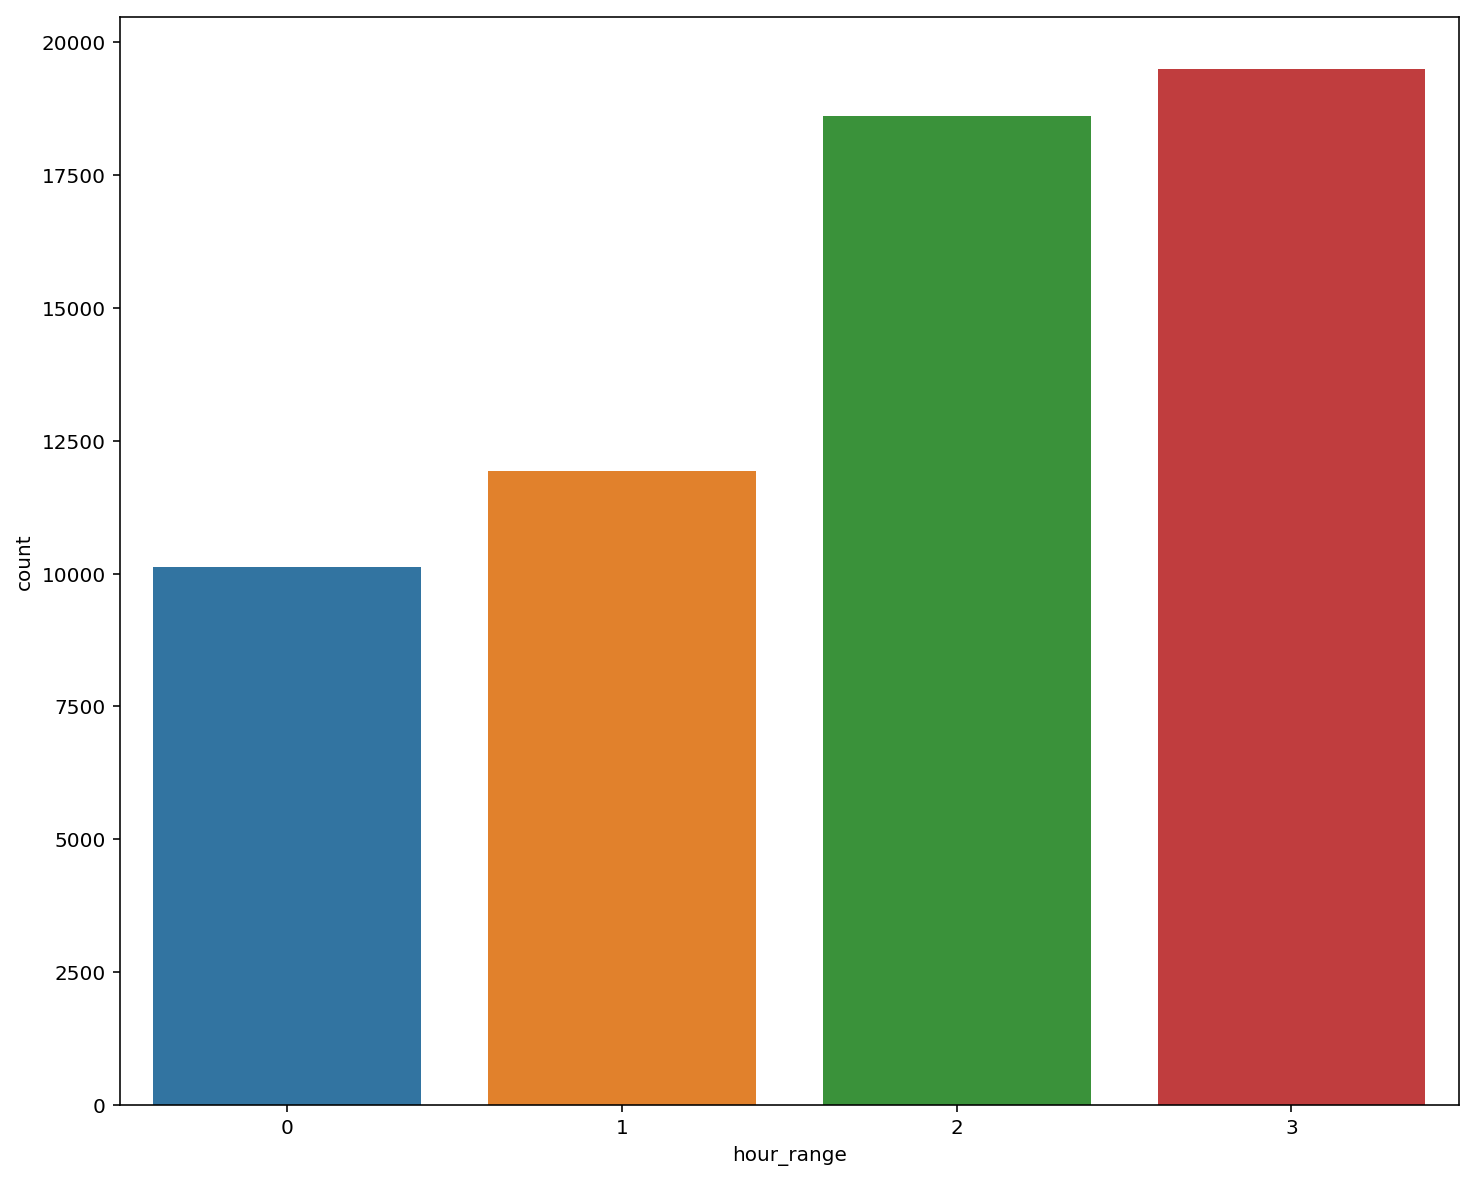

In [45]:
sns.countplot(x='hour_range', data=df)